# DATA SCIENCE SCHOOL :: Introduction to ML in Python
### An Intensive Python ML Course
## Cross-Validation and Regularization in Multiple Linear Regression

[&larr; Back to course webpage](http://datakolektiv.com/app_direct/introdsnontech/)

![](../img/IntroMLPython_Head.png)

Feedback should be send to [goran.milovanovic@datakolektiv.com](mailto:goran.milovanovic@datakolektiv.com). 

These notebooks accompany the DATA SCIENCE SCHOOL :: Introduction to ML in Python course.

### Goran S. Milovanović, PhD
<b>DataKolektiv, Chief Scientist & Owner</b>

### Aleksandar Cvetković, PhD
<b>DataKolektiv, Consultant</b>

![](../img/DK_Logo_100.png)

## Setup

In [1]:
### --- Setup - importing the libraries

# - supress those annoying 'Future Warning'
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


# - data
import numpy as np
import pandas as pd

# - os
import os


# - visualization
import matplotlib.pyplot as plt
import seaborn as sns


# - parameters
%matplotlib inline
pd.options.mode.chained_assignment = None  # default='warn'
sns.set_theme()

# - rng
rng = np.random.default_rng()

# - plots
plt.rc("figure", figsize=(8, 6))
plt.rc("font", size=14)
sns.set_theme(style='white')

# - directory tree
data_dir = os.path.join(os.getcwd(), '_data')

In [2]:
data_set = pd.read_csv(os.path.join(data_dir, 'kc_house_data.csv'))
data_set.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [3]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
# - we remove some redundant or problematic predictors
model_frame = data_set.drop(columns = ['id', 'lat', 'long', 'date', 'yr_renovated'])
model_frame.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,98178,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,98125,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,98028,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,98136,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,98074,1800,7503


In [5]:
# - we separate categorical from the numerical predictors
categorical_df = model_frame[['zipcode', 'view']]
numerical_df = model_frame.drop(columns = ['zipcode', 'view'])

In [6]:
# - number of zipcode categories
len(categorical_df['zipcode'].unique())

70

In [7]:
# - view categories
categorical_df['view'].unique()

array([0, 3, 4, 2, 1], dtype=int64)

In [8]:
### --- Encoding the categorical variables
from sklearn.preprocessing import OneHotEncoder

# - for each categorical variables we employ Dummy Encoding
# - we take the value appearing the first as the reference category

# - encoding the 'view' variable
enc_view = OneHotEncoder(drop='first', sparse=False)
dummy_view = enc_view.fit_transform(categorical_df['view'].values.reshape(-1, 1))

# - encoding the 'zipcode' variable
enc_zipcode = OneHotEncoder(drop='first', sparse=False)
dummy_zipcode = enc_zipcode.fit_transform(categorical_df['zipcode'].values.reshape(-1, 1))

# - concatenating encoded variables into a single binary matrix
# - it has 73 columns: 69 (i.e. 70-1) for the 'zipcode', and 4 (5-1) for the 'view'
X0 = np.concatenate((dummy_view, dummy_zipcode), axis=-1)
X0.shape

(21613, 73)

In [9]:
### --- Constructing the feature matrix and the target vector

# - dropping the dependent (numerical) 'price' variable
X1 = numerical_df.drop(columns='price').values

# - conncatenating the encoded variables matrix with the matrix of numerical variables values
X = np.concatenate((X0, X1), axis=-1)
print(X.shape)

# - target vector values
y = numerical_df['price'].values

(21613, 86)


In [10]:
### --- Splitting the dataset into two folds - "train" fold and "test" fold of equal sizes
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=513)

X_train.shape, X_test.shape

((10806, 86), (10807, 86))

We will preform *Regularized MLR* using the *Elastic-Net* regularization, obtained by minimizing the function

$$\frac{1}{2}MSE + \alpha\Big(\rho L_1 + \frac{1 - \rho}{2}L_2^2\Big).$$

This model has two hyperparameters: *penalization* $\alpha > 0$, and *$L_1$-ratio* $\rho\in[0,1]$.

Since there are two hyperparameters to tune, we will perform a cross-validation for each one. However, one CV will be "explicit" (for the $\rho$ hyperparameter), and the other one "implicit" (for $\alpha$). 

We make a grid of values for $\rho$ in the interval $(0,1)$. For every value of $\rho$ we first fit `ElasticNetCV` on the "train" fold to, where it will perform the second ("implicit") CV on this fold to find the best value of $\alpha$ from a given range. Then we shall evaluate the model with best $\alpha$ on the "test" fold. Then, we switch the "train" and "test" fold - we fit another `ElasticNetCV` on the "test" fold (where it will search for best $\alpha$) and evaluate it on "train fold".

This way we obtain two models for each $\rho$. For each model we compute the avarege score, and we select the $\rho$ which outputs the models with the best average score. We compute the "best" $\alpha$ as the average of $\alpha$s of the selected models.

Note that we will not use values 0 and 1 for $\rho$, as this would lead to *Ridge* and *LASSO* regularization, respectivelly. However, we encourage you to try out CV for $\alpha$ for these two regularizations, as an exercise.

In [38]:
from sklearn.linear_model import ElasticNetCV


# - fitting an instance of Elastic-Net, with fixed \rho = 0.5, on the train fold
# - \alpha is found via "implicit" CV
elNetCV = ElasticNetCV(l1_ratio=.5, eps=1e-5)
elNetCV.fit(X_train, y_train)

ElasticNetCV(eps=1e-05)

In [39]:
elNetCV.alpha_

22481.775866227727

In [40]:
# - evaluating R^2 score on the test fold
sc1 = elNetCV.score(X_test, y_test)
sc1

0.5071649842179153

In [14]:
# - SE on the test fold
er1 = np.sum((elNetCV.predict(X_test) - y_test)**2)
er1

725266298358133.4

In [15]:
# - now fitting Elastic-Net CV with \rho = 0.5 on the test fold
elNetCV.fit(X_test, y_test)

ElasticNetCV(eps=1e-05)

In [16]:
elNetCV.alpha_

32052.48194425882

In [17]:
# - evaluating R^2 score on the train fold
sc2 = elNetCV.score(X_train, y_train)
sc2

0.5062998626223363

In [18]:
# - mean R^2 score of the model
(sc1 + sc2)/2

0.5067324234201258

In [19]:
# - SE on the train fold
er2 = np.sum((elNetCV.predict(X_train) - y_train)**2)
er2

711567958005254.4

In [20]:
# - average SE of the model
(er1 + er2)/2

718417128181693.9

In [21]:
### --- CV on the grid of L1-ratios

# - the grid of L1-ratios
rhos = np.arange(.01, 1, .01)


mean_best_alphas = []
mean_best_SEs = []
mean_best_scores = []
mean_best_coefs = []

for rho in rhos:
    
    # - defining an instance of Elastic-Net CV for a given \rho
    # - eps defines the range of \alphas on which the model will perfom "implicit" CV
    elNetCV = ElasticNetCV(l1_ratio=rho, eps=1e-5, max_iter=10**5)
    
    # - fitting on the train fold, evaluating R^2 and SE on the test fold; storing the coefficients
    elNetCV.fit(X_train, y_train)
    alpha1 = elNetCV.alpha_
    SE1 = np.sum((elNetCV.predict(X_test) - y_test)**2)
    score1 = elNetCV.score(X_test, y_test)
    coefs1 = elNetCV.coef_
    
    # - now we switch train and test folds
    elNetCV.fit(X_test, y_test)
    alpha2 = elNetCV.alpha_
    SE2 = np.sum((elNetCV.predict(X_test) - y_test)**2)
    score2 = elNetCV.score(X_test, y_test)
    coefs2 = elNetCV.coef_

    # - calculating averages of \alphas, SEs, R^2 scores and coefficients
    mean_best_alphas.append((alpha1+alpha2)/2)
    mean_best_SEs.append((SE1 + SE2)/2)
    mean_best_scores.append((score1 + score2)/2)
    mean_best_coefs.append((coefs1 + coefs2)/2)

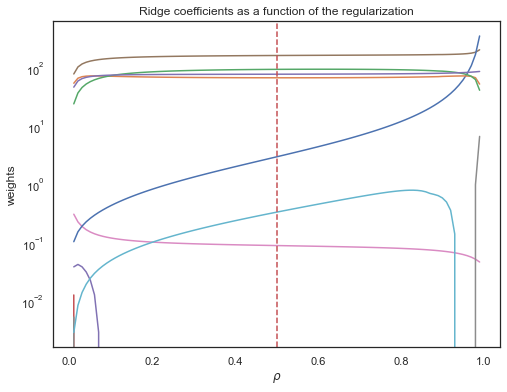

In [25]:
### --- Plotting the dependence of model parameters vs. the L1-ratio hyperparameter
ax = plt.gca()

ax.plot(rhos, mean_best_coefs)
ax.axvline(x=.5, c='r', ls='--') # red line, corresponding to \rho = 0.5
plt.xlabel("$\\rho$")
plt.yscale('log')
plt.ylabel("weights")
plt.title("Model coefficients as a function of the L1-ratio")
plt.axis("tight")
plt.show()

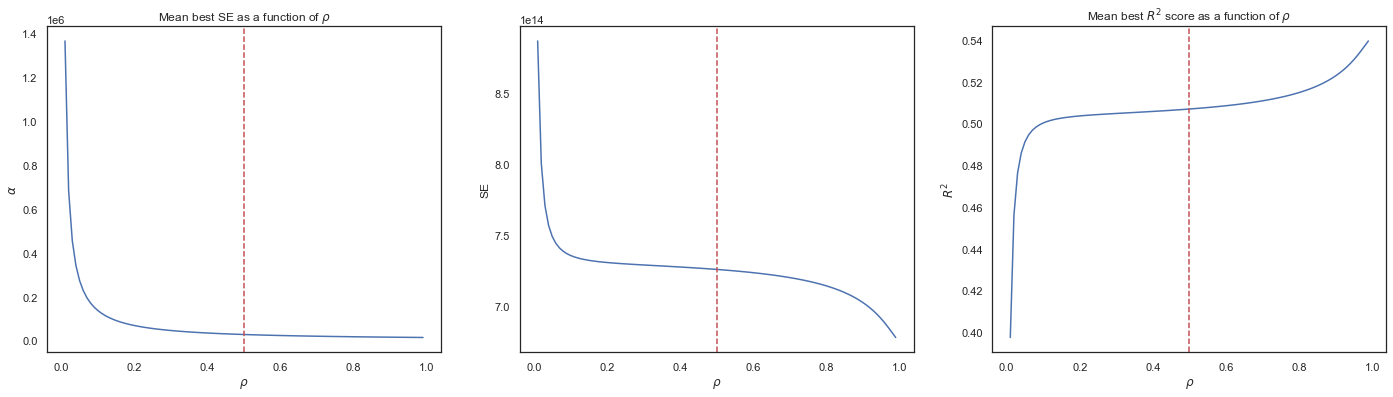

In [26]:
### --- Plotting the dependance of various model metrics vs. the L1-ratio hyperparameter
ig, ax = plt.subplots(1, 3, figsize=(24, 6), sharex=True)


# - optimal \alpha vs. \rho
ax[0].plot(rhos, mean_best_alphas)
ax[0].axvline(x=.5, c='r', ls='--') # red line
ax[0].set_xlabel("$\\rho$")
ax[0].set_ylabel("$\\alpha$")
ax[0].set_title("Mean optimal $\\alpha$ as a function of $\\rho$")
ax[0].axis("tight")

# - SE vs. \rho
ax[1].plot(rhos, mean_best_SEs)
ax[1].axvline(x=.5, c='r', ls='--') # red line
ax[1].set_xlabel("$\\rho$")
ax[1].set_ylabel("SE")
ax[0].set_title("Mean best SE as a function of $\\rho$")
ax[1].axis("tight")

# - R^2 vs. \alpha
ax[2].plot(rhos, mean_best_scores)
ax[2].axvline(x=.5, c='r', ls='--') # red line
ax[2].set_xlabel("$\\rho$")
ax[2].set_ylabel("$R^2$")
ax[2].set_title("Mean best $R^2$ score as a function of $\\rho$")
ax[2].axis("tight");

In [27]:
# - finding the best \rho as the one which produces the lowest average SE from the 2-fold CV
best_rho_idx = np.argmin(mean_best_SEs)
best_rho = rhos[best_rho_idx]
best_rho

0.99

In [28]:
# - average \alpha corresponding to the best model of 2-fold CV
best_alpha = mean_best_alphas[best_rho_idx]
best_alpha

13771.277224870344

In [29]:
from sklearn.linear_model import ElasticNet

# - fitting an Elastic-Net model to the selected values of hyperparameters \alpha and \rho
# - we fit this model to the entire dataset
elNetCV_best = ElasticNet(l1_ratio=.99, alpha=best_alpha, max_iter=10**5)
elNetCV_best.fit(X, y)

ElasticNet(alpha=13771.277224870344, l1_ratio=0.99, max_iter=100000)

In [30]:
elNetCV_best.intercept_

4148165.8884676034

In [31]:
elNetCV_best.coef_

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [32]:
elNetCV_best.score(X, y)

0.539080947874581

In [33]:
### --- Making predictions with the selected Elastic-Net model
pred_frame = pd.DataFrame()

pred_frame['Price']= model_frame['price']
pred_frame['Predicted Price'] = elNetCV_best.predict(X)

pred_frame.head()

,Price,Predicted Price
0,221900.0,293311.041198
1,538000.0,687312.210053
2,180000.0,353810.438441
3,604000.0,465445.673797
4,510000.0,392314.119411


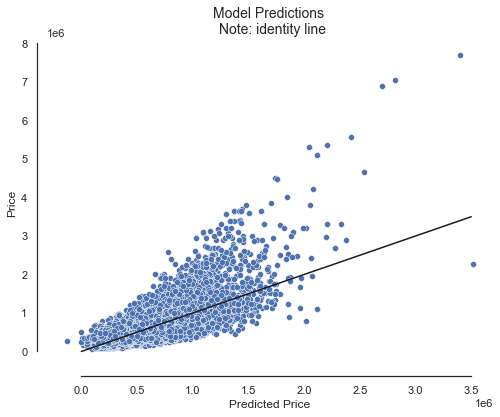

In [34]:
# - plotting the true values vs predicted values
# - the identity line (y=x) shows how good is the prediction - the closer the datapoint to the line, the better
sns.scatterplot(data=pred_frame, x='Predicted Price', y='Price')
sns.lineplot(x=np.arange(0, 3.5e+6, 1000), y=np.arange(0, 3.5e+6, 1000), color='k')
sns.despine(offset=10, trim=True)
plt.title('Model Predictions \n Note: identity line', fontsize=14);

Note that the selected hyperparameters for $\rho$ and $\alpha$ are the most optimal for a given search space. However, by extending (or refining) this search space, we could construct even better model. 

One way of accomplishing this is by setting the parameter `eps` in the `ElasticNetCV` constructor even smaller (and increasing the number of `max-iter`). Here we went with `eps=1e-5` because we wanted our computations to run fast enough; setting it smaller would require more iterations for the underlying optimization method to run, thus requiring more waiting time.

Another way is by making the grid of $\alphas$s even finer by setting the `n_alphas` in the `ElasticNetCV` constructor to a number > 100 (which is a defauld for this parameter). 

A user can also supplement the `ElasticNetCV` with their own grid for $\alpha$ hyperparameters. 

We enourage playing around with setting the search space for $\alpha$ in order to produce an even better model, as an exercise. 

Goran S. Milovanović & Aleksandar Cvetković

DataKolektiv, 2022/23.

[hello@datakolektiv.com](mailto:goran.milovanovic@datakolektiv.com)

![](../img/DK_Logo_100.png)

<font size=1>License: <a href="https://www.gnu.org/licenses/gpl-3.0.txt">GPLv3</a> This Notebook is free software: you can redistribute it and/or modify it under the terms of the GNU General Public License as published by the Free Software Foundation, either version 3 of the License, or (at your option) any later version. This Notebook is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the GNU General Public License for more details. You should have received a copy of the GNU General Public License along with this Notebook. If not, see <a href="http://www.gnu.org/licenses/">http://www.gnu.org/licenses/</a>.</font>